(288, 2)
Largest TS: 2.949003333788665
2.95 & 75.00 & -75.00 \\ \hline
2.72 & 240.00 & 15.00 \\ \hline
2.35 & 255.00 & 0.00 \\ \hline
2.32 & 345.00 & -75.00 \\ \hline
2.28 & 120.00 & 30.00 \\ \hline
2.19 & 120.00 & 45.00 \\ \hline
2.17 & 105.00 & -75.00 \\ \hline
2.15 & 345.00 & 15.00 \\ \hline
2.12 & 180.00 & -15.00 \\ \hline
2.07 & 120.00 & 0.00 \\ \hline
2.05 & 45.00 & 0.00 \\ \hline
2.02 & 15.00 & -45.00 \\ \hline
2.00 & 255.00 & -30.00 \\ \hline
1.87 & 345.00 & -60.00 \\ \hline
1.84 & 210.00 & -60.00 \\ \hline
1.82 & 150.00 & -15.00 \\ \hline
1.78 & 345.00 & 75.00 \\ \hline
1.73 & 75.00 & 0.00 \\ \hline
1.67 & 225.00 & -15.00 \\ \hline
1.64 & 45.00 & 45.00 \\ \hline


<ipython-input-4-13ec525759d1>:89: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolormesh = ax.pcolormesh(np.deg2rad(every_pt[:, :, 0])-np.pi,


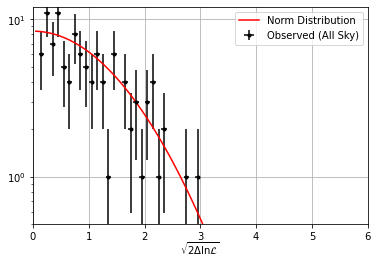

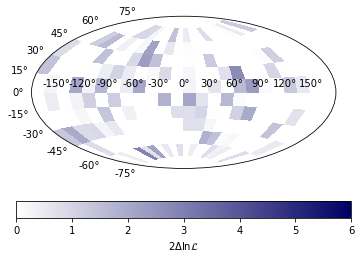

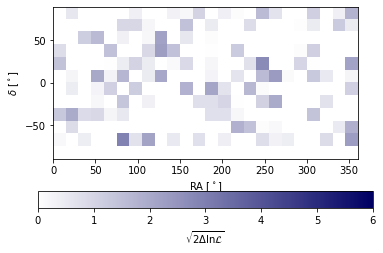

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.optimize import curve_fit
import IceCubeAnalysis

def main(fit_file_name, step_size=2):
    """
    Plots the results from the all-sky
    best-fit source search.
    Also prints out the most likely points on the sky.
    Parameters
    ----------
    fit_file_name : str
        Pickle file of the best-fit likelihood map.
        
    step_size : float
        The degrees step size to perform the all-sky search.
    """

    likelihood_map = np.load(fit_file_name,
                             allow_pickle=True)
    likelihood_map[likelihood_map <= 0.0] = 0.0
    
    ns_map = np.load("./processed_data/calculated_fit_ns_map_allsky_spacial.npy", allow_pickle = True)
    ns_map[ns_map<=0.0] = 0.0
    
    
    
    
    
    cord_s, ra_len, dec_len = IceCubeAnalysis.prepare_skymap_coordinates(step_size)
    print(cord_s.shape)
    every_pt = np.reshape(cord_s, (ra_len, dec_len, cord_s.shape[-1]))

    sqrt_ts = np.sqrt(2.0 * likelihood_map)
    sqrt_ts[np.abs(every_pt[:, :, 1]) > 87.0] = 0.0

    print("Largest TS:", np.max(sqrt_ts))

    # Printout used to import table into Latex
    
    """
    for i in index_of_best[:20]:
        print("%.2f & %.2f & %.2f \\\\ \hline" % (sqrt_ts.flatten()[i],
                                                  every_pt[:, :, 0].flatten()[i],
                                                  every_pt[:, :, 1].flatten()[i]))

    """

    ngc_1068 = np.logical_and(sqrt_ts.flatten()>=4.0, np.logical_and(every_pt[:, :, 0].flatten()>40, every_pt[:, :, 0].flatten()<42))
    
    counts, bin_edges = np.histogram(sqrt_ts.flatten()[np.logical_and(ngc_1068==False, ns_map.flatten() != 0)],
                                     range=(0, 6),
                                     bins=60)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
    index_of_best = np.argsort(-1 * sqrt_ts.flatten()[np.logical_and(ngc_1068==False, ns_map.flatten() != 0)])

    # Fit the histogram with a gaussian.
    def log_gaus(x, a, b):
        return a + b * x * x 

    bins_to_fit = counts != 0
    bins_to_fit = bins_to_fit >0.05

    popt, pcov = curve_fit(log_gaus,
                           bin_centers[bins_to_fit],
                           np.log(counts[bins_to_fit]))

    counts_with, bin_edges_with = np.histogram(sqrt_ts.flatten(),
                                     range=(0, 6),
                                     bins=60)
    bin_centers_with = (bin_edges_with[:-1] + bin_edges_with[1:]) / 2.0

    bins_to_fit_with = counts_with != 0
    bins_to_fit_with = bins_to_fit_with >0.05

    popt_with, pcov_with = curve_fit(log_gaus,
                           bin_centers_with[bins_to_fit_with],
                           np.log(counts_with[bins_to_fit_with]))

    
    
    counts_ngc, bin_edges_ngc = np.histogram(sqrt_ts.flatten()[ngc_1068],
                                     range=(0, 6),
                                     bins=60)
    bin_centers_ngc = (bin_edges_ngc[:-1] + bin_edges_ngc[1:]) / 2.0


    chisq = np.sum((counts[bins_to_fit] - log_gaus(bin_centers[bins_to_fit], *popt))/np.sqrt(counts[bins_to_fit])**2)
    
    print(chisq/(len(counts[bins_to_fit])-1))
    
    
    
    chisq_with = np.sum((counts_with[bins_to_fit_with] - log_gaus(bin_centers_with[bins_to_fit_with], *popt_with))/np.sqrt(counts_with[bins_to_fit_with])**2)
    
    print(chisq_with/(len(counts_with[bins_to_fit_with])-2))

    ###90th percentile stuff 
    1.181033960775292
    
    for i in index_of_best[:20]:
        print("%.2f & %.2f & %.2f \\\\ \hline" % (sqrt_ts.flatten()[np.logical_and(ngc_1068==False, ns_map.flatten() != 0)][i],
                                                  every_pt[:, :, 0].flatten()[np.logical_and(ngc_1068==False, ns_map.flatten() != 0)][i],
                                                  every_pt[:, :, 1].flatten()[np.logical_and(ngc_1068==False, ns_map.flatten() != 0)][i]))



    
    counts_90, bin_edges_90 = np.histogram(sqrt_ts.flatten(),
                                     range=(0, 6),
                                     bins=60)
    bin_centers_90 = (bin_edges_90[:-1] + bin_edges_90[1:]) / 2.0

    bins_to_fit_90 = counts_90 != 0
    bin_centers_fit_90 = bin_centers_90[bins_to_fit_90]
    counts_fit_90 = counts_90[bins_to_fit_90]
    popt_90, pcov_90 = curve_fit(log_gaus,
                           bin_centers_fit_90[bin_centers_fit_90<2],
                           np.log(counts_fit_90[bin_centers_fit_90<2]))


    
    fig, ax = plt.subplots()
    ax.set_yscale('log')
    
    ax.errorbar(bin_centers, counts, xerr=3/len(counts), yerr=np.sqrt(counts),
                color="black", label="Observed (Northern Hemisphere)", fmt='.')
    
    ax.errorbar(bin_centers_ngc, counts_ngc, xerr=3/len(counts_ngc), yerr=np.sqrt(counts_ngc),
                color="black", alpha = 0.5, label="NGC 1068", fmt='.')

    
    
    ax.plot(bin_centers, np.exp(log_gaus(bin_centers, *popt)),
            color='blue', label="Normal Distribution")
    
    ax.plot(bin_centers_with, np.exp(log_gaus(bin_centers_with, *popt_with)),
            color='blue', alpha = 0.4, label="Normal Distribution with NGC 1068")
    
    ax.set_ylim(0.5, 2.0 * counts[1])
    ax.set_xlim(0.0, 6)
    ax.set_xlabel("$\sqrt{2 \Delta \ln \mathcal{L}}$", labelpad=10)
    ax.set_ylabel("Number of sources")
    ax.grid()
    ax.legend(fontsize = "small")
    plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)    
    #plt.savefig("A03p2_fit_allsky_histogram.pdf", dpi=300)
    """
    np.savez("./plot_data/energy_distribution.npz",
            energy_dist_x = bin_centers,
            energy_dist_y = counts)
            
    """
    plt.show()
    
    # Residual time
    fig, ax = plt.subplots()
    residual = counts - np.exp(log_gaus(bin_centers, *popt))
    ax.errorbar(bin_centers, residual, xerr=3/len(counts), yerr=np.sqrt(counts),
                color="black", label="Observation", fmt='.')
    
    ax.set_ylim(-50.0, 50.0)
    ax.set_xlim(0.0, 6.0)
    ax.set_xlabel("$\sqrt{2 \Delta \ln \mathcal{L}}$")
    ax.set_ylabel("Fit Residual: Data - Fit")
    ax.legend()
    ax.grid()
    plt.savefig("./plots/A03p2_fit_allsky_histogram_res.png", dpi=300)
    
    N = 256
    vals = np.ones((N, 4))
    vals[:, 0] = np.linspace(1, 0/256, N)
    vals[:, 1] = np.linspace(1, 0/256, N)
    vals[:, 2] = np.linspace(1, 100/256, N)
    newcmp = ListedColormap(vals)
    print(np.shape(every_pt[:, :, 0]),np.shape(every_pt[:, :, 1]), np.shape(sqrt_ts))
    ax = plt.subplot(111, projection="aitoff")
    pcolormesh = ax.pcolormesh(np.deg2rad(every_pt[:, :, 0])-np.pi,
                               np.deg2rad(every_pt[:, :, 1]),
                               sqrt_ts,
                               cmap=newcmp, vmin=0, vmax=6)
    cbar = plt.colorbar(pcolormesh, orientation="horizontal")
    cbar.set_label("$\sqrt{2 \Delta \ln \mathcal{L}}$")
    ax.set_rasterized(True)
    plt.savefig("./plots/A03p2_fit_allsky_map_aitoff.pdf", dpi=300)

    plt.figure()
    plt.imshow(np.flip(sqrt_ts.transpose(), axis=0),
               cmap=newcmp, extent=(0, 360, -90, 90), vmin=0, vmax=6)
    plt.xlabel("RA [$^\circ$]")
    plt.ylabel("$\delta$ [$^\circ$]")
    cbar = plt.colorbar(orientation="horizontal")
    cbar.set_label("$\sqrt{2 \Delta \ln \mathcal{L}}$")

    plt.show()
    plt.figure()
    plt.scatter(every_pt[:,:,1],sqrt_ts)
    plt.show()
    
    return sqrt_ts.flatten(), every_pt[:, :, 0].flatten(), every_pt[:, :, 1].flatten(), ns_map.flatten()

if __name__ == "__main__":
    fit_file_name = "./processed_data/calculated_fit_likelihood_map_allsky_spacial.npy"
    sqrt_ts, ra, dec, ns = main(fit_file_name, step_size=1)